<a href="https://colab.research.google.com/github/FinancialEngineerLab/finefinance/blob/master/Bigdata_pair_trading_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install library #
!pip install -U finance_datareader
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2020-03-05 04:31:12--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-03-05 04:31:12--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://svwh.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-03-05 04:31:12--  https://svwh.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving svwh.dl.sourceforge.ne

In [ ]:
# load library #
import FinanceDataReader as fdr
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#import mpl_finance
import datetime
import seaborn
from statsmodels.tsa.stattools import coint

In [ ]:
## Data MGT ##
def load_financial_data(ticker, start_date, end_date, output_file):
  try:
    df = pd.read_pickle(output_file)
    print('File data found ... reading data')
  except FileNotFoundError:
    print('File not found ... downloading data')
    df = pd.DataFrame(fdr.DataReader(ticker, start_date, end_date))
    df.to_pickle(output_file)
  return df
'''
## DataFrame Maker ##
ticker_list = ["US500","JP225"]
df_list = [fdr.DataReader(ticker, '2019-01-01')['Close'] for ticker in ticker_list]
df_list
df = pd.concat(df_list, axis=1)
df.columns = ticker_list
df = df.dropna()
print(df.head())'''

'\n## DataFrame Maker ##\nticker_list = ["US500","JP225"]\ndf_list = [fdr.DataReader(ticker, \'2019-01-01\')[\'Close\'] for ticker in ticker_list]\ndf_list\ndf = pd.concat(df_list, axis=1)\ndf.columns = ticker_list\ndf = df.dropna()\nprint(df.head())'



---


Step1. Operating Linearly Correlated Elements

---



In [ ]:
def find_cointegrated_pairs(data):
  n = data.shape[1]
  pvalue_matrix = np.ones((n,n))
  keys = data.keys()
  pairs = []
  for i in range(n):
    for j in range(i+1, n):
      result = coint(data[keys[i]], data[keys[j]])
      pvalue_matrix[i, j] = result[1]
      if result[1] < 0.02: # Significanc level
        pairs.append((keys[i], keys[j]))
  return pvalue_matrix, pairs
'''
ticker_list = ["EUR/USD","USD/JPY","GBP/USD","USD/CHF","USD/CAD","EUR/JPY","AUD/USD","NZD/USD",
              "EUR/GBP","EUR/CHF","AUD/JPY","GBP/JPY","CHF/JPY","EUR/CAD","AUD/CAD","CAD/JPY",
              "NZD/JPY","AUD/NZD","GBP/AUD","EUR/AUD","GBP/CHF","EUR/NZD","AUD/CHF","GBP/NZD",
              "USD/INR","USD/CNY","USD/SGD","USD/HKD","USD/DKK","GBP/CAD","USD/SEK","USD/RUB",
              "USD/TRY","USD/MXN","USD/ZAR","CAD/CHF","NZD/CAD","NZD/CHF","USD/PLN","US500",
              "JP225","NDX","UK100","EU50","HCEI", "KS200", "DE30", "GC","HG","PA",
              "SI","PL"] # hangseng no working
'''
ticker_list = ["EUR/USD","USD/JPY","GBP/USD","USD/CHF","USD/CAD","AUD/USD","NZD/USD"
              ,"EUR/CHF","CHF/JPY"
              ,"USD/CNY","USD/SGD","USD/HKD","USD/DKK","USD/RUB",
              "USD/TRY","USD/MXN","USD/PLN","US500",
              "JP225","NDX","UK100","EU50","HCEI", "KS200", "DE30", "GC","HG","PA",
              "SI","PL"] # hangseng no working
symbolsids = ticker_list
## DataFrame Maker ##
#import re
#ticker_list = re.sub('[-=+,#‘|>`\'…》]','',symbolsids)
df_list_wtm = [fdr.DataReader(ticker, '2020-02-24')['Close'] for ticker in ticker_list]
df_list_mtm = [fdr.DataReader(ticker, '2019-07-31')['Close'] for ticker in ticker_list]
df_list_year =[fdr.DataReader(ticker, '2019-02-24')['Close'] for ticker in ticker_list]
df_list_total =[fdr.DataReader(ticker, '2015-01-01')['Close'] for ticker in ticker_list]

#df_list = pd.DataFrame(df_list)
df1_raw = pd.concat(df_list_wtm, axis=1)
df2_raw = pd.concat(df_list_mtm, axis=1)
df3_raw = pd.concat(df_list_year, axis=1)
df4_raw = pd.concat(df_list_total, axis=1)

df1_raw.columns = ticker_list
df1_raw = df1_raw.dropna()
df2_raw.columns = ticker_list
df2_raw = df2_raw.dropna()
df3_raw.columns = ticker_list
df3_raw = df3_raw.dropna()
df4_raw.columns = ticker_list
df4_raw = df4_raw.dropna()

#df1 = np.log(df1_raw/df1_raw.shift(1))
#df2 = np.log(df2_raw/df2_raw.shift(1))
##df3 = np.log(df3_raw/df3_raw.shift(1))
#df4 = np.log(df4_raw/df4_raw.shift(1))
df1 = df1_raw
df2 = df2_raw
df3 = df3_raw
df4 = df4_raw

df1.columns = ticker_list
df1 = df1.dropna()
df2.columns = ticker_list
df2 = df2.dropna()
df3.columns = ticker_list
df3 = df3.dropna()
df4.columns = ticker_list
df4 = df4.dropna()
#print(df.head())
#df
pvalues1, pairs1 = find_cointegrated_pairs(df1)
pvalues2, pairs2 = find_cointegrated_pairs(df2)
pvalues3, pairs3 = find_cointegrated_pairs(df3)
pvalues4, pairs4 = find_cointegrated_pairs(df4)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


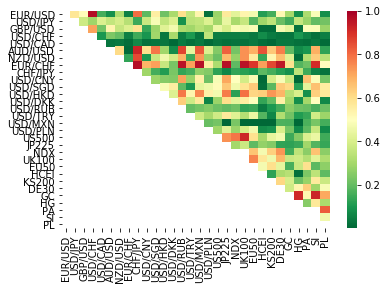

In [ ]:
#pvalues visulization
seaborn.heatmap(pvalues4, xticklabels = symbolsids,
                yticklabels = symbolsids, cmap = 'RdYlGn_r',
                mask = (pvalues4 >= 0.98)) # significance level

In [ ]:
#print(pairs,len(pairs))
result_pairs = list(set(pairs1).intersection(pairs2,pairs3,pairs4))
result_pairs_2 = list(set(pairs2).intersection(pairs3))
result_pairs_4= list(set(pairs4))
result_pairs_3= list(set(pairs3))

result_pairs_short = list(set(pairs1))
result_pairs_mid = list(set(pairs2))

result_pairs_3
#print(result_pairs_short)
#print(result_pairs)

#'GBP/USD', 'UK100'.
#('USD/JPY', 'EU50')

[('EUR/USD', 'EUR/CHF'),
 ('USD/DKK', 'SI'),
 ('USD/DKK', 'GC'),
 ('EUR/USD', 'AUD/USD'),
 ('USD/CHF', 'USD/HKD'),
 ('EUR/USD', 'GC'),
 ('EUR/USD', 'SI'),
 ('USD/JPY', 'GBP/USD'),
 ('USD/CHF', 'EUR/CHF'),
 ('USD/RUB', 'UK100'),
 ('USD/JPY', 'HCEI'),
 ('EUR/CHF', 'GC')]

In [ ]:
### Visualization ###

df1_raw.columns = ticker_list
df1_raw = df1_raw.dropna()
df2_raw.columns = ticker_list
df2_raw = df2_raw.dropna()
df3_raw.columns = ticker_list
df3_raw = df3_raw.dropna()
df4_raw.columns = ticker_list
df4_raw = df4_raw.dropna()

symbol_1 = df3_raw['EUR/USD']
symbol_2 = df3_raw['SI']

#plt.title(" ")
symbol_1.plot()
#symbol_2.plot()
plt.show()

ValueError: ignored

In [ ]:
symbol_2.plot()


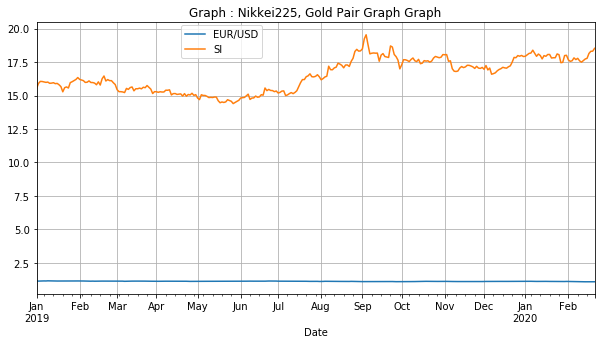

In [ ]:

## Test1 ##
## DataFrame Maker ##
ticker_list = ["EUR/USD", "SI"]
'''ticker_list = ["EUR/USD","USD/JPY","GBP/USD","USD/CHF","USD/CAD","EUR/JPY","AUD/USD","NZD/USD",
              "EUR/GBP","EUR/CHF","AUD/JPY","GBP/JPY","CHF/JPY","EUR/CAD","AUD/CAD","CAD/JPY",
              "USD/INR","USD/CNY","USD/SGD","USD/HKD","USD/DKK","GBP/CAD","USD/SEK","USD/RUB",
              "USD/TRY","USD/MXN","NZD/CAD","NZD/CHF","USD/PLN","US500",
              "JP225","NDX","UK100","EU50","HCEI", "KS200", "DE30", "GC","HG","PA",
              "SI","PL"] # hangseng no working'''
df_list = [fdr.DataReader(ticker, '2019-01-01')['Close'] for ticker in ticker_list]
df_list

df = pd.concat(df_list, axis=1)
df.columns = ticker_list
df = df.dropna()
#df

def corr_graph_result(ticker,ticker2, start_date):
  corrdf = df[start_date:]

  ax_0 = corrdf.plot(secondary_y = ticker2, figsize = (10,5))
  plt.title('Graph : Nikkei225, Gold Pair Graph Graph')
  plt.grid()
  ax_0.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.show()

corr_graph_result('GC','JP225', '2019-01-01')

In [ ]:
# place orders chart
symbol_1 = df['EUR/USD']
symbol_2 = df['SI']
ratios = symbol_1 / symbol_2
ratios.describe()
ratios.plot()
plt.title("  Ratio")
plt.axhline(ratios.mean())
plt.legend(['Ratios'])
plt.show()

KeyError: ignored

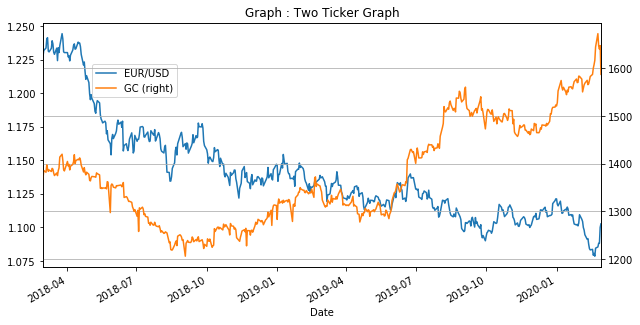

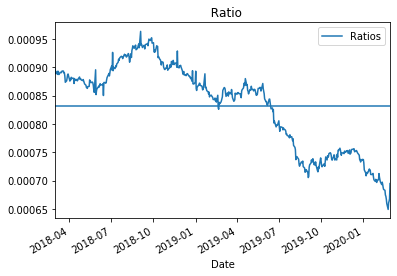

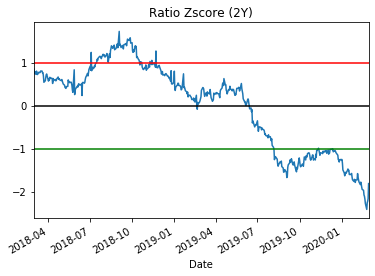

In [ ]:

## DataFrame Maker ##
ticker_list = ["EUR/USD", "GC"]
df_list = [fdr.DataReader(ticker, '2018-03-01')['Close'] for ticker in ticker_list]
df_list

df = pd.concat(df_list, axis=1)
df.columns = ticker_list
df = df.dropna()
#df

def corr_graph_result(ticker,ticker2, start_date):
  corrdf = df[start_date:]

  ax_0 = corrdf.plot(secondary_y = ticker2, figsize = (10,5))
  plt.title('Graph : Two Ticker Graph')
  plt.grid()
  ax_0.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.show()

corr_graph_result('EUR/USD','GC', '2018-03-01')
# place orders chart
symbol_1 = df['EUR/USD']
symbol_2 = df['GC']
ratios = symbol_1 / symbol_2
ratios.describe()
ratios.plot()
plt.title("  Ratio")
plt.axhline(ratios.mean())
plt.legend(['Ratios'])
plt.show()

zscore = (ratios - ratios.mean())/ratios.std(ddof=0)
zscore.plot()
plt.title("Ratio Zscore (2Y)")
plt.axhline(zscore.mean(), color = "black")
plt.axhline(1.0, color = "red")
plt.axhline(-1.0, color = "green")

In [ ]:
zscore.tail(10)

Date
2020-02-17   -1.968694
2020-02-18   -2.077557
2020-02-19   -2.107496
2020-02-20   -2.174356
2020-02-21   -2.275772
2020-02-24   -2.412879
2020-02-25   -2.259133
2020-02-26   -2.222569
2020-02-27   -2.166222
2020-02-28   -1.811795
dtype: float64

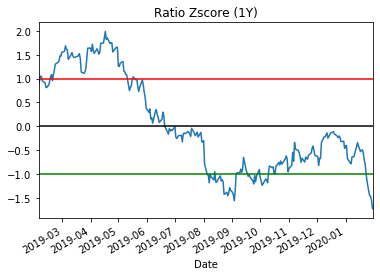

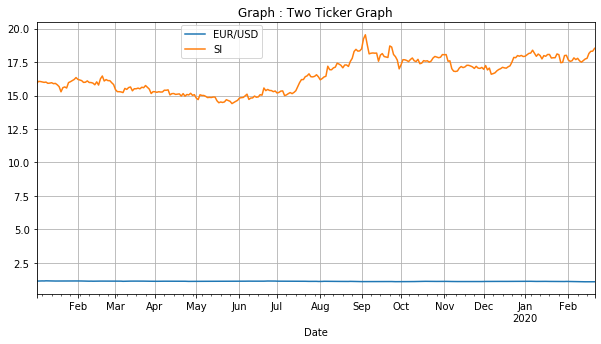

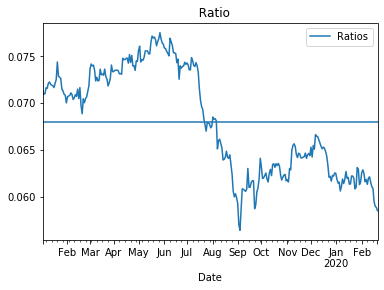

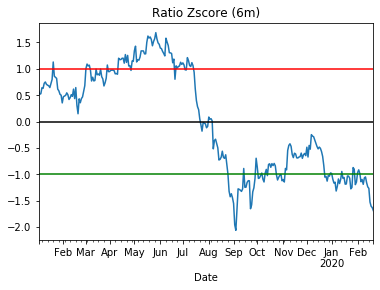

In [ ]:

## DataFrame Maker ##
ticker_list = ["EUR/USD", "SI"]
df_list = [fdr.DataReader(ticker, '2019-01-02')['Close'] for ticker in ticker_list]
df_list

df = pd.concat(df_list, axis=1)
df.columns = ticker_list
df = df.dropna()
#df

def corr_graph_result(ticker,ticker2, start_date):
  corrdf = df[start_date:]

  ax_0 = corrdf.plot(secondary_y = ticker2, figsize = (10,5))
  plt.title('Graph : Two Ticker Graph')
  plt.grid()
  ax_0.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.show()

corr_graph_result('USD/JPY','EU50', '2019-01-01')
# place orders chart
symbol_1 = df['EUR/USD']
symbol_2 = df['SI']
ratios = symbol_1 / symbol_2
ratios.describe()
ratios.plot()
plt.title("  Ratio")
plt.axhline(ratios.mean())
plt.legend(['Ratios'])
plt.show()

zscore = (ratios - ratios.mean())/ratios.std(ddof=0)
zscore.plot()
plt.title("Ratio Zscore (6m)")
plt.axhline(zscore.mean(), color = "black")
plt.axhline(1.0, color = "red")
plt.axhline(-1.0, color = "green")

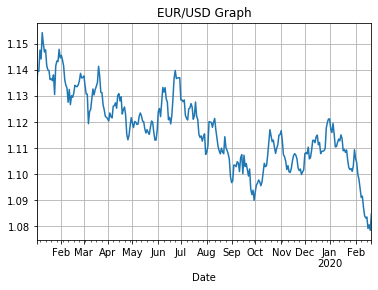

In [ ]:
plt.title("EUR/USD Graph")
df['EUR/USD'].plot()
plt.grid()


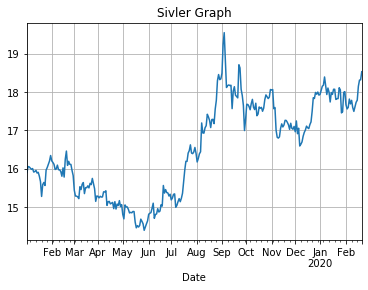

In [ ]:

plt.title("Sivler Graph")
df['SI'].plot()
plt.grid()

In [ ]:
zscore.tail(10)

Date
2020-01-21    0.345271
2020-01-22    0.117482
2020-01-23   -0.359712
2020-01-24   -0.825039
2020-01-26   -1.433451
2020-01-27   -1.672027
2020-01-28   -1.711285
2020-01-29   -1.938284
2020-01-30   -2.382753
2020-01-31   -2.435131
dtype: float64

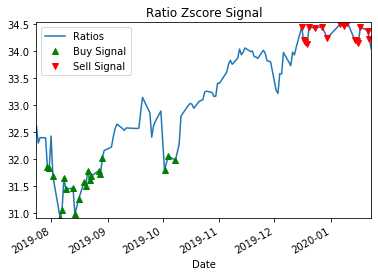

In [ ]:
'''### place orders chart ###

#train = ratios[:75]
#test = ratios[75:]


zscore = (ratios - ratios.mean())/ratios.std(ddof=0)
ratios.plot()
buy = ratios.copy()
sell = ratios.copy()
buy[zscore>-1] = 0
sell[zscore<1] = 0
plt.title("Ratio Zscore Signal")
buy.plot(color = "g", linestyle = "None", marker = "^")
sell.plot(color = "r", linestyle = "None", marker = "v")
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.legend(["Ratios", "Buy Signal", "Sell Signal"])

plt.show()'''

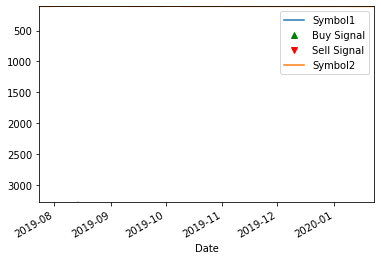

In [ ]:
### Buy and Sell order for each symbol ###

symbol_1.plot()
buy_1 = ratios.copy()
sell_1 = ratios.copy()
buy_1[zscore>-1] = 0
sell_1[zscore<1] = 0
buy_1.plot(color = "g", linestyle = "None", marker = "^")
sell_1.plot(color = "r", linestyle = "None", marker = "v")

symbol_2.plot()
buy_2 = ratios.copy()
sell_2 = ratios.copy()
buy_2[zscore<1] = 0
sell_2[zscore>-1] = 0
buy_2.plot(color = "g", linestyle = "None", marker = "^")
sell_2.plot(color = "r", linestyle = "None", marker = "v")

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, symbol_1.min(),symbol_2.max()))
plt.legend(["Symbol1", "Buy Signal","Sell Signal", "Symbol2"])
plt.show()

In [ ]:
### Main Trading Strategy : Ratio Zscore ###

# Strategy : Ratios(price1 / price2)'s Zscore
# Enter Position : z score < -1 => short symbol1, long symbol2
# Exit Position : next z score within -1 ~ +1 => long symbol1, short symbol2

# Data Frame #

symbol1_buy=symbol_1.copy()
symbol1_sell=symbol_1.copy()
symbol2_buy=symbol_2.copy()
symbol2_sell=symbol_2.copy()
symbol1_buy[zscore>-1] = 0
symbol2_sell[zscore>-1] = 0
symbol1_sell[zscore<1] = 0
symbol2_buy[zscore<1] = 0

pair_correlation_trading_strategy = pd.DataFrame(index = symbol_1.index)
pair_correlation_trading_strategy['Symbol1_close'] = symbol_1
pair_correlation_trading_strategy['Symbol2_close'] = symbol_2
pair_correlation_trading_strategy['Symbol1_buy'] = np.zeros(len(symbol_1))
pair_correlation_trading_strategy['Symbol1_sell'] = np.zeros(len(symbol_1))
pair_correlation_trading_strategy['Symbol2_buy'] = np.zeros(len(symbol_1))
pair_correlation_trading_strategy['Symbol2_sell'] = np.zeros(len(symbol_1))
pair_correlation_trading_strategy['Delta'] = np.zeros(len(symbol_1))

position = 0
s1_shares = 100
for i in np.arange(0, len(symbol_1)):
  s1positions = symbol_1[i] * s1_shares
  s2positions = symbol_2[i] * int(s1positions/symbol_2[i])
  delta_position = s1positions-s2positions

  if not position and symbol1_buy[i] != 0:
    pair_correlation_trading_strategy['Symbol1_buy'][i] = s1positions
    pair_correlation_trading_strategy['Symbol2_sell'][i] = s2positions
    pair_correlation_trading_strategy['Delta'][i] = delta_position
    position = 1
  elif not position and symbol1_sell[i] != 0:
    pair_correlation_trading_strategy['Symbol1_sell'][i] =  s1positions
    pair_correlation_trading_strategy['Symbol2_buy'][i] =  s2positions
    pair_correlation_trading_strategy['Delta'][i] = delta_position
    position = -1
  elif position == -1  and (symbol1_sell[i] ==0 or i == len(symbol_1)-1):
    pair_correlation_trading_strategy['Symbol1_buy'][i] = s1positions
    pair_correlation_trading_strategy['Symbol2_sell'][i] = s2positions
    position = 0
  elif position == 1 and  (symbol1_buy[i]==0 or i == len(symbol_2)-1):
    pair_correlation_trading_strategy['Symbol1_sell'][i] =s1positions
    pair_correlation_trading_strategy['Symbol2_buy'][i] =s2positions
    position = 0

pair_correlation_trading_strategy['Symbol1_position'] =pair_correlation_trading_strategy['Symbol1_buy']-pair_correlation_trading_strategy['Symbol1_sell']
pair_correlation_trading_strategy['Symbol2_position'] =pair_correlation_trading_strategy['Symbol2_buy']-pair_correlation_trading_strategy['Symbol2_sell']
pair_correlation_trading_strategy['Symbol1_position'].cumsum().plot(linestyle = "--")
pair_correlation_trading_strategy['Symbol2_position'].cumsum().plot(linestyle = ":")
pair_correlation_trading_strategy['Total_position'] =pair_correlation_trading_strategy['Symbol1_position'] + pair_correlation_trading_strategy['Symbol2_position']
pair_correlation_trading_strategy['Total_position'].cumsum().plot()
plt.title("Symbol1 and Symbol2 positions")
plt.legend()
plt.show()

NameError: ignored

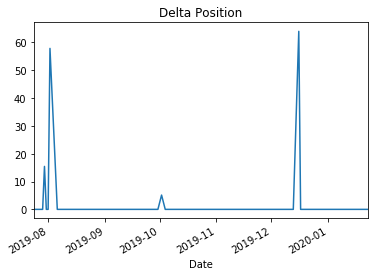

In [ ]:
pair_correlation_trading_strategy['Delta'].plot()
plt.title("Delta Position")
plt.show()